In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

color_dict = {'+':'tab:blue', '-':'tab:orange'}

In [3]:
data = pd.read_csv('../merge/data_with_features.txt',sep='\t')
data = data[(data['tumor_fraction']>0.1) & (data['ulp_wgs_coverage']>0.1) &
            (data['merged_updated_ER_status_binary']!='none')]
print(len(data['sample'].unique()))

191


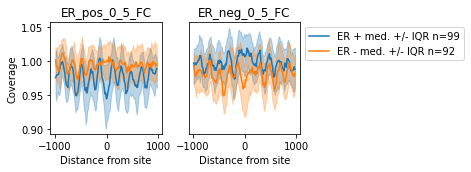

In [4]:
fig,axes = plt.subplots(1,2, figsize = (8,2.5), sharey='row')

for i,site_name in enumerate(['ER_pos_0_5_FC', 'ER_neg_0_5_FC']):
    for subtype in ['+','-']:
        ax = axes[i]
        current = data[(data['site_name']==site_name) & (data['merged_updated_ER_status_binary']==subtype)]
        ax.plot(plot_columns,current[str_plot_columns].median(), color = color_dict[subtype], label = 'ER '+subtype+' med. +/- IQR n='+str(len(current)))
        ax.fill_between(plot_columns,np.percentile(current[str_plot_columns],25, axis=0),np.percentile(current[str_plot_columns],75, axis=0), color = color_dict[subtype], alpha = 0.3)
        ax.set_title(site_name)
        ax.set_xlabel('Distance from site')
        
axes[0].set_ylabel('Coverage')
        
axes[1].legend(loc = 'upper left', bbox_to_anchor = [1,1])
# ylim = axes[0].get_ylim()  
# axes[0].set_ylim(ylim[0]-.02,ylim[1])
# axes[1].tick_params(labelleft=True)

axes[1].tick_params(left = False)

axes[0].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
axes[1].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')


fig.tight_layout()
fig.subplots_adjust(wspace=-.5)
fig.savefig('cov_profiles/non_heme_cov_profiles.pdf')